# Installation

In [ ]:
!pip install pandas matplotlib scikit-learn

# Importing

In [209]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Loading Dataset

In [225]:
data = pd.read_csv('./dataset/play_tennis.csv')
df = pd.DataFrame(data)

In [226]:
df.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


# Encoding

In [227]:
df['PlayTennis'] = df['PlayTennis'].map({'Yes': 1, 'No': 0})
y = df['PlayTennis']

X = df.drop(columns=['PlayTennis'])
X = pd.get_dummies(X, drop_first=True)

# splitting doesn't perform due to the size of the dataset

In [228]:
X

,Outlook_Rainy,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak
0,False,True,True,False,False,True
1,False,True,True,False,False,False
2,False,False,True,False,False,True
3,True,False,False,True,False,True
4,True,False,False,False,True,True
5,True,False,False,False,True,False
6,False,False,False,False,True,False
7,False,True,False,True,False,True
8,False,True,False,False,True,True
9,True,False,False,True,True,True


In [231]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayTennis, dtype: int64

# Model Building

In [230]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Tree Rules

In [219]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- Humidity_Normal <= 0.50
|   |--- Outlook_Sunny <= 0.50
|   |   |--- Wind_Weak <= 0.50
|   |   |   |--- class: 0
|   |   |--- Wind_Weak >  0.50
|   |   |   |--- class: 1
|   |--- Outlook_Sunny >  0.50
|   |   |--- class: 0
|--- Humidity_Normal >  0.50
|   |--- Wind_Weak <= 0.50
|   |   |--- Outlook_Rainy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Outlook_Rainy >  0.50
|   |   |   |--- class: 0
|   |--- Wind_Weak >  0.50
|   |   |--- class: 1



# Tree

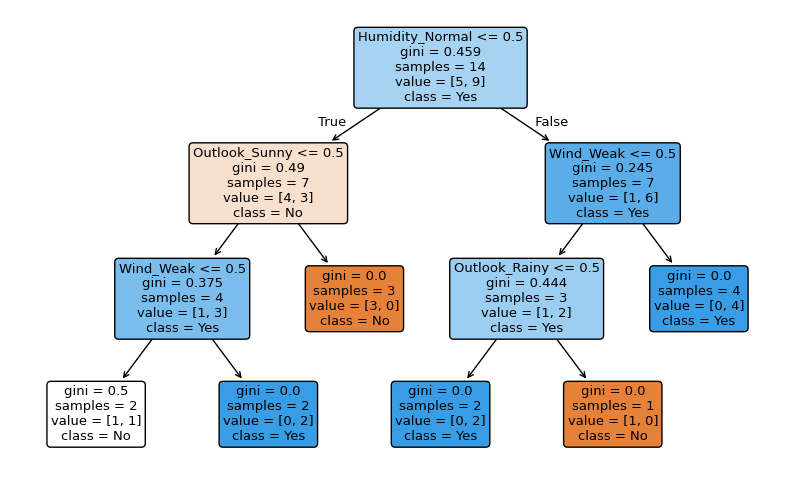

In [220]:
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X.columns, 
               class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()